Visualizing distribution of first 60 hours of 250 times series. Vitals, labs, dx and AKI (acute kidney injury) scores.

In [1]:
# import packages

import os
import pandas as pd
from glob import glob 
import numpy as np
import time
import math
import impyute as impy
from collections import Counter

from tslearn.clustering import KShape
from tslearn.utils import to_time_series
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import cdist_dtw

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

In [ ]:
# read and append vitals data

os.chdir("/path")
strain = glob("*.csv")

vitals = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename)
    df = df.sort_values(by = ['feature1', 'feature2'])
    vitals = vitals.append(df.head(n*4)) # first n patients * 4 (15-minute increments)

In [ ]:
# read and append labs data

os.chdir("/path")
strain = glob("*.csv")

labs = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename)
    df = df.sort_values(by = ['feature1', 'feature2'])
    labs = labs.append(df.head(n*4))

In [ ]:
## read and append aki data

os.chdir("/path")
strain = glob("*.csv")

aki = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename)   
    df = df.sort_values(by = ['feature1', 'feature2'])
    aki = aki.append(df.head(n))

In [ ]:
# read and append dx data

os.chdir("/path")
strain = glob("*.csv")

dx = pd.DataFrame()

for filename in strain:
    df = pd.read_csv(filename) 
    df = df.sort_values(by = ['feature1', 'feature2'])
    dx = dx.append(df.head(n*4))

In [ ]:
# merge data for visualizing distribution

vitals_labs = pd.merge(vitals, labs, on = ['patientunitstayid', 'hr_slot', 'min15_slot'], how = 'inner')
dx_aki = pd.merge(dx, aki, on = ['patientunitstayid', 'hr_slot'], how = 'inner')
X = pd.merge(vitals_labs, dx_aki, on = ['patientunitstayid', 'hr_slot'], how = 'inner')

In [4]:
# select master by hour, here we are limited by the dx which is by hour
X = X.iloc[3::4, :]

In [6]:
y = X.pop('label')

In [9]:
# Random undersampling

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 357337, 1: 2663})
Resampled dataset shape Counter({0: 2663, 1: 2663})


In [10]:
X_res['label'] = y_res

In [11]:
item_counts = X_res['label'].value_counts()
print(item_counts)

1    2663
0    2663
Name: explicit_sepsis_ind, dtype: int64


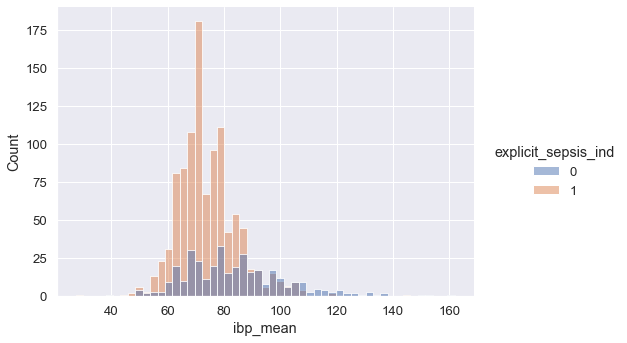

In [15]:
sns.displot(
  data=X_res,
  x="feature_x",
  hue="label_hue",  
  kind="hist",
  aspect=1.4
)

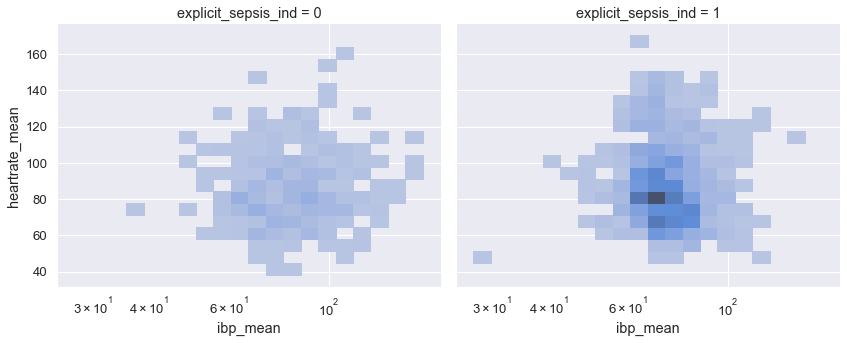

In [25]:
sns.displot(
  data=X_res,
  x="feature_x",
  y="feature_y",
  col="label_hue",
  kind="hist",
  height=5,
  aspect=1.2,
  log_scale=(10,0),
  bins=20
)

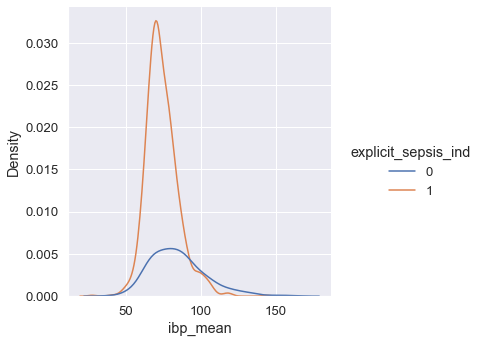

In [35]:
sns.displot(X_res, x="feature_x", hue="label_hue", kind="kde") # kernel density estimation

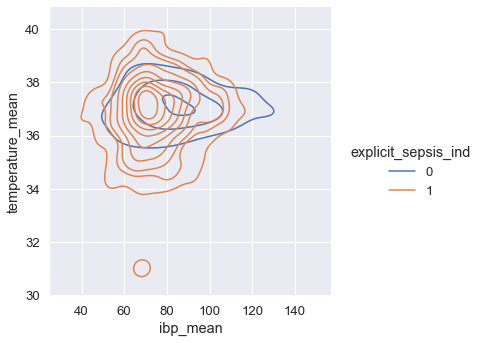

In [36]:
sns.displot(X_res, x="feature_x", x="feature_y", hue="label_hue", kind="kde") # kernel density estimation

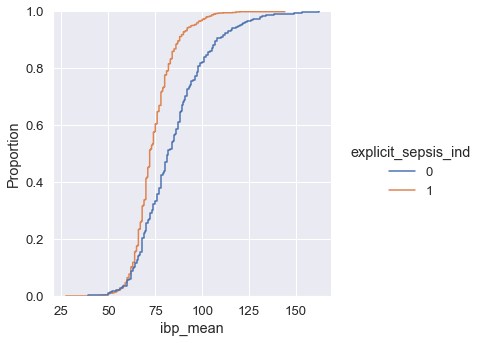

In [39]:
sns.displot(X_res, x="feature_x", hue="label_hue", kind="ecdf") # empirical distribution function

In [ ]:
# table of labels with counts from each hour

Xgb = X_res.groupby(['hour', 'label']).size().unstack(fill_value = 0)
Xgb

In [ ]:
# line plot of discribution of labels over time

Xgb.plot(kind = 'line')